In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import lightgbm as lgb
import talib
import warnings
warnings.simplefilter('ignore')
import matplotlib
print(matplotlib.get_configdir())

/Users/junyakuramochi/.matplotlib


In [6]:
data=pd.read_csv('/Users/junyakuramochi/Desktop/GBP:USD .csv')

In [7]:
data=data.iloc[::-1]
data

,日付け,終値,始値,高値,安値,前日比%
386,2020年01月01日,1.3254,1.3261,1.3276,1.3237,-0.04%
385,2020年01月02日,1.3144,1.3255,1.3268,1.3115,-0.83%
384,2020年01月03日,1.3086,1.3138,1.3162,1.3053,-0.44%
383,2020年01月06日,1.3167,1.3075,1.3175,1.3063,0.62%
382,2020年01月07日,1.3123,1.3168,1.3213,1.3095,-0.33%
...,...,...,...,...,...,...
4,2021年06月18日,1.3809,1.3921,1.3945,1.3792,-0.79%
3,2021年06月21日,1.3929,1.3811,1.3937,1.3786,0.87%
2,2021年06月22日,1.3947,1.3931,1.3965,1.3860,0.13%
1,2021年06月23日,1.3959,1.3948,1.4002,1.3923,0.09%


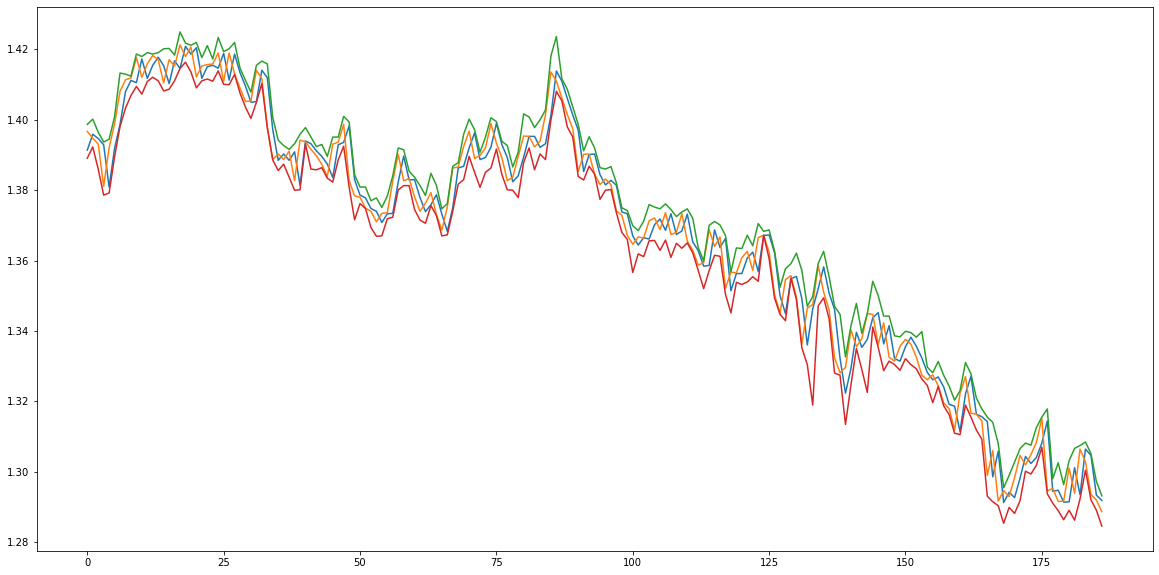

In [8]:
plt.rcParams['figure.figsize'] = (20,10)
data[200:].plot()
plt.legend().remove()
plt.show()

In [9]:
#SMAを短期=5,中期=75,長期=200
data['sma5']=talib.SMA(data["終値"], timeperiod=5)
data['sma50']=talib.SMA(data["終値"], timeperiod=50)
data['sma100']=talib.SMA(data["終値"], timeperiod=100)

In [10]:
#EMAも同様に設定する
data['ema5']=talib.EMA(data['終値'],timeperiod=5)
data['ema50']=talib.EMA(data['終値'],timeperiod=50)
data['ema100']=talib.EMA(data['終値'],timeperiod=100)

In [11]:
#rsiを期間9,14で設定する
data['rsi9']=talib.RSI(data['終値'],timeperiod=9)
data['rsi14']=talib.RSI(data['終値'],timeperiod=14)

In [12]:
#MACDは
macd, macdsignal, macdhist = talib.MACD(data['終値'], fastperiod=12, slowperiod=26, signalperiod=9)
data['macd']=macd
data['macdsignal']=macdsignal
data['macdhist']=macdhist

In [32]:
data

,日付け,終値,始値,高値,安値,前日比%,sma5,sma50,sma100,ema5,ema50,ema100,rsi9,rsi14,macd,macdsignal,macdhist
286,2020年05月20日,1.2239,1.2241,1.2289,1.2221,-0.10%,1.22018,1.228120,1.264065,1.222846,1.240824,1.264265,43.546444,44.324209,-0.005454,-0.003710,-0.001744
285,2020年05月21日,1.2222,1.2240,1.2250,1.2185,-0.14%,1.22010,1.227422,1.263143,1.222631,1.240094,1.263432,41.980934,43.411489,-0.005457,-0.004059,-0.001398
284,2020年05月22日,1.2164,1.2226,1.2242,1.2161,-0.47%,1.22130,1.227198,1.262221,1.220554,1.239165,1.262500,36.890557,40.358042,-0.005860,-0.004419,-0.001441
283,2020年05月25日,1.2182,1.2179,1.2205,1.2163,0.15%,1.22116,1.227030,1.261236,1.219769,1.238343,1.261623,39.453755,41.727900,-0.005966,-0.004729,-0.001237
282,2020年05月26日,1.2331,1.2190,1.2364,1.2179,1.22%,1.22276,1.227592,1.260444,1.224213,1.238137,1.261058,56.069510,51.631340,-0.004791,-0.004741,-0.000050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021年06月18日,1.3809,1.3921,1.3945,1.3792,-0.79%,1.39814,1.401900,1.393558,1.394985,1.402349,1.390194,21.589719,30.946901,-0.002635,0.001657,-0.004292
3,2021年06月21日,1.3929,1.3811,1.3937,1.3786,0.87%,1.39448,1.402278,1.393826,1.394290,1.401979,1.390247,38.454544,41.502183,-0.003300,0.000666,-0.003965
2,2021年06月22日,1.3947,1.3931,1.3965,1.3860,0.13%,1.39182,1.402676,1.394108,1.394427,1.401693,1.390335,40.610128,42.911825,-0.003639,-0.000195,-0.003444
1,2021年06月23日,1.3959,1.3948,1.4002,1.3923,0.09%,1.39126,1.403038,1.394423,1.394918,1.401466,1.390446,42.130262,43.882691,-0.003768,-0.000910,-0.002858


In [43]:
graph=data.iloc[:,6:]

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

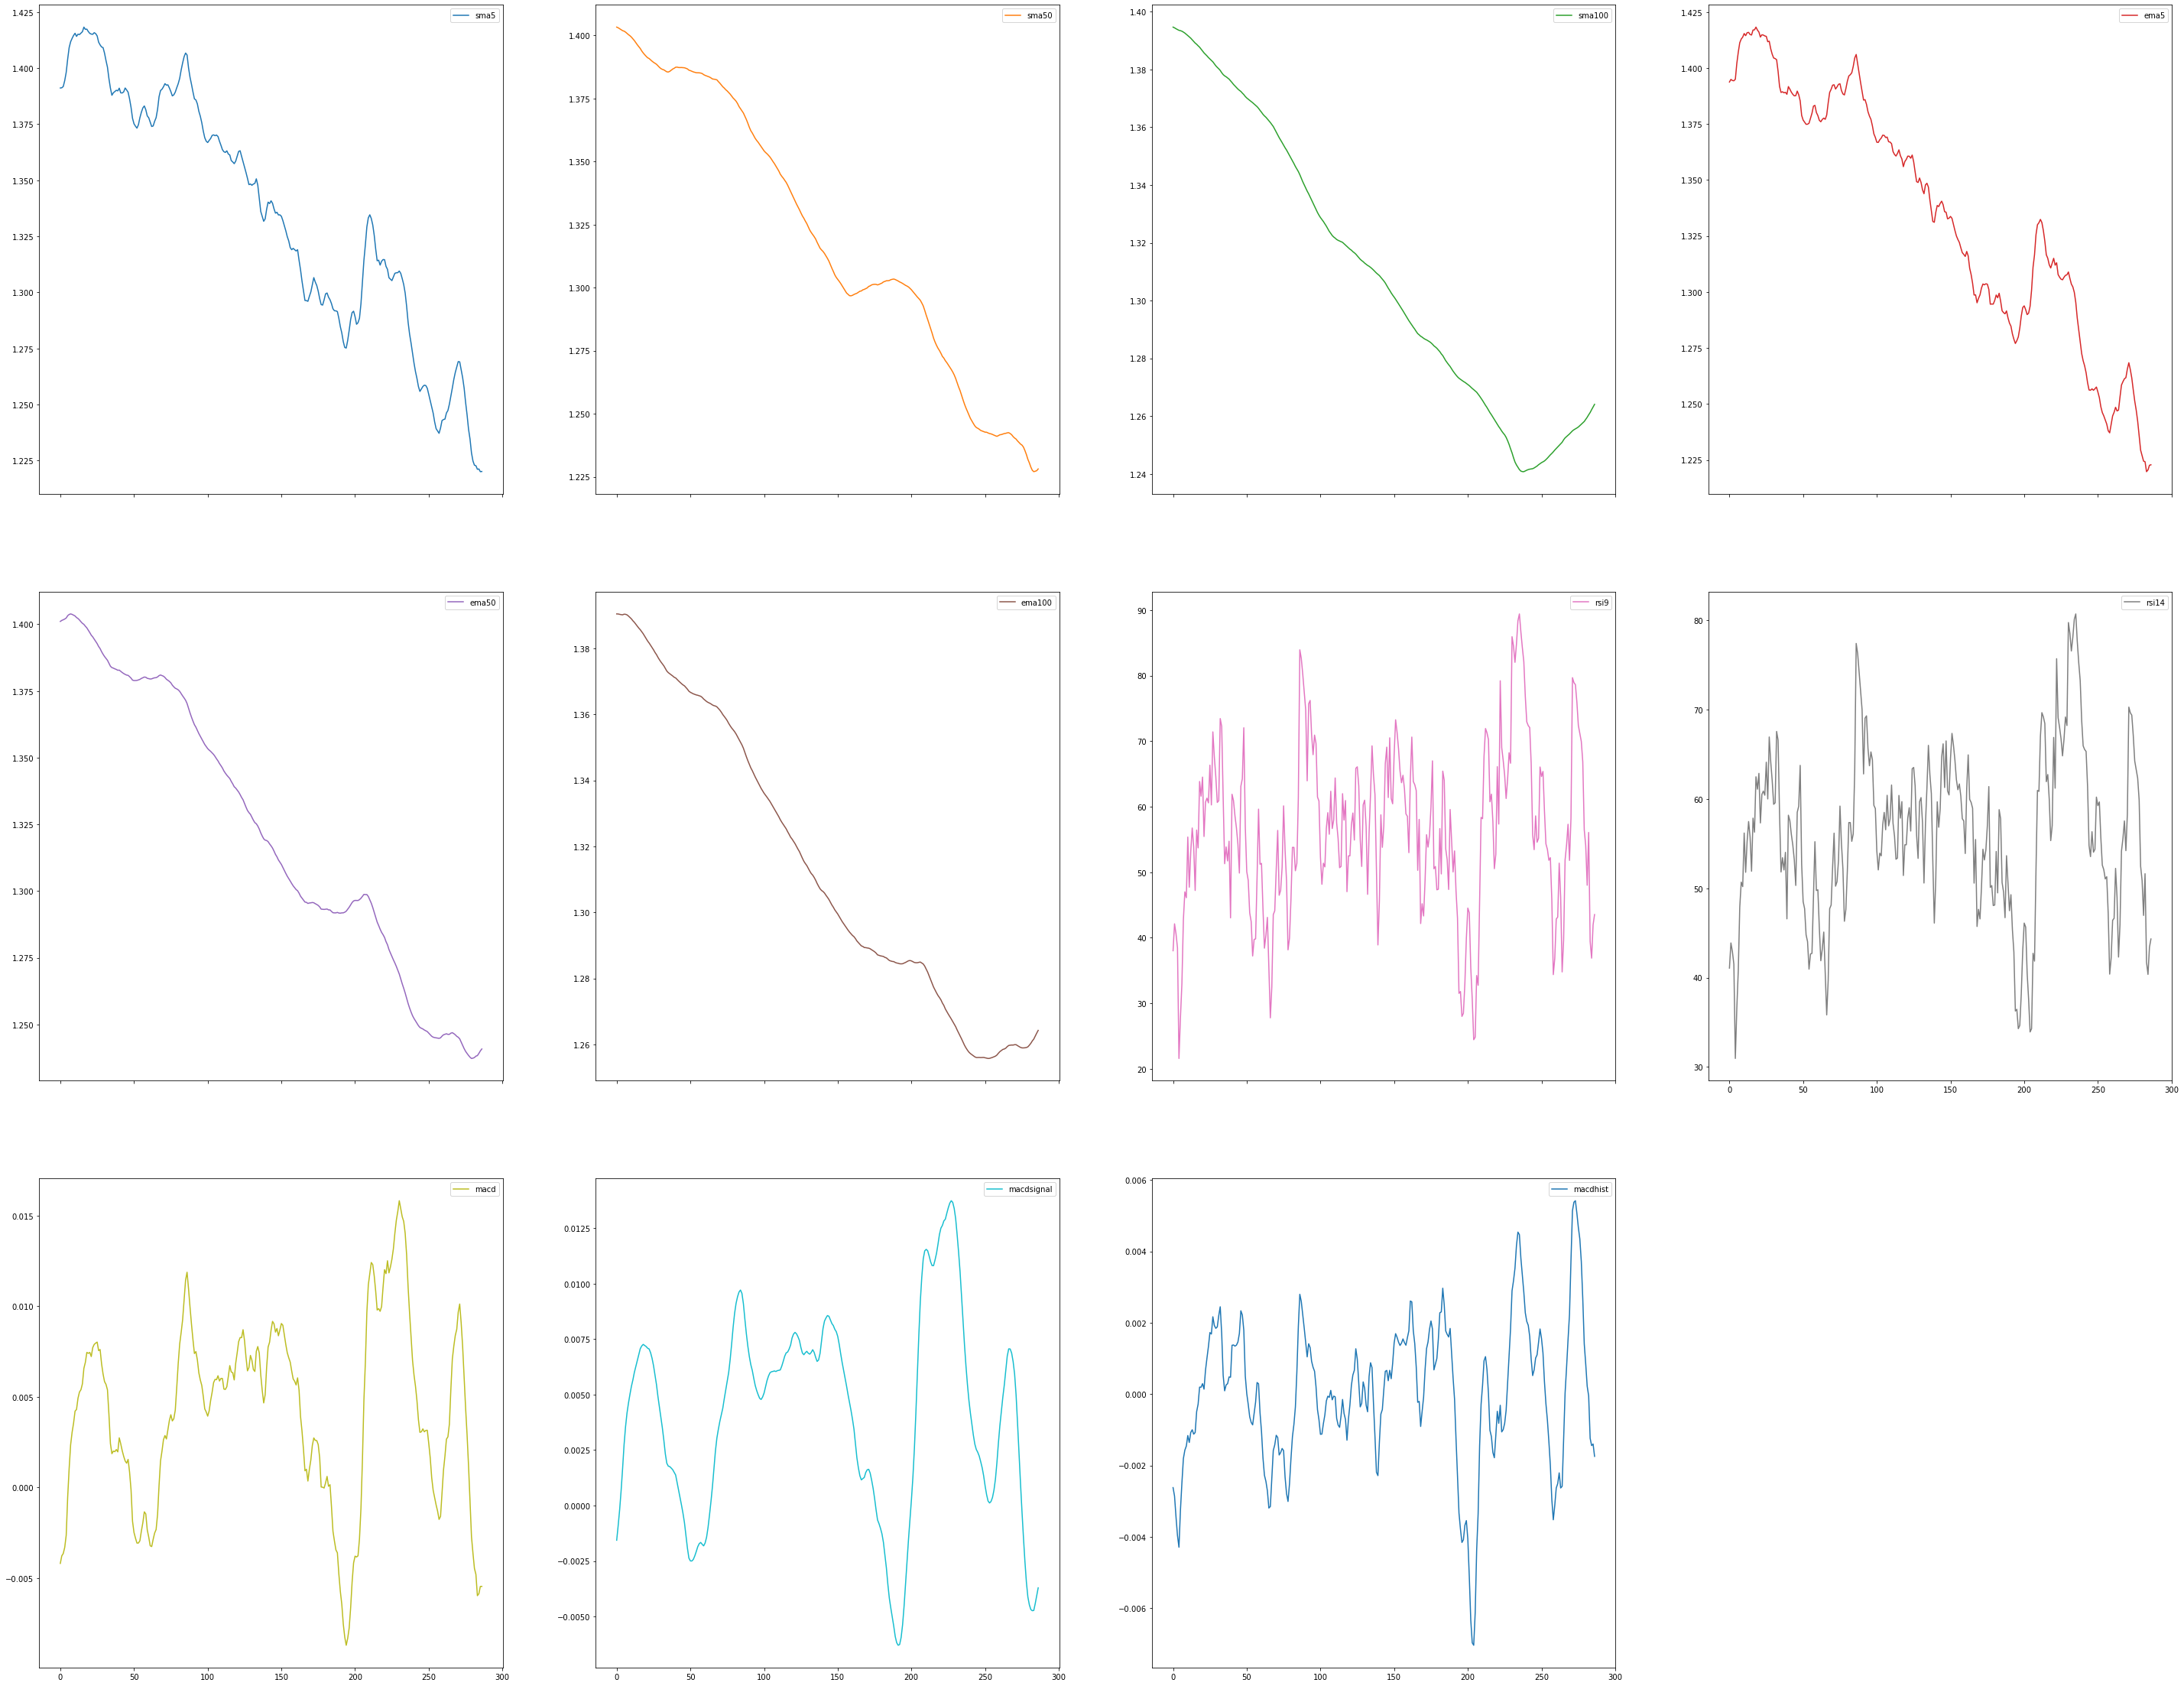

In [54]:
plt.rcParams['figure.figsize'] = (50,40)
graph.plot(subplots=True, layout=(3,4))

In [15]:
#data[0:100]まではNaNが存在するのでdata[100:]から利用する
data=data[100:]
#目的変数→終値､始値､高値､安値
train_Y=data['終値']
#説明変数
train_X=data.drop(['終値','日付け','前日比%'],axis=1)

In [16]:
train_Y

286    1.2239
285    1.2222
284    1.2164
283    1.2182
282    1.2331
        ...  
4      1.3809
3      1.3929
2      1.3947
1      1.3959
0      1.3914
Name: 終値, Length: 287, dtype: float64

In [17]:
train_X

,始値,高値,安値,sma5,sma50,sma100,ema5,ema50,ema100,rsi9,rsi14,macd,macdsignal,macdhist
286,1.2241,1.2289,1.2221,1.22018,1.228120,1.264065,1.222846,1.240824,1.264265,43.546444,44.324209,-0.005454,-0.003710,-0.001744
285,1.2240,1.2250,1.2185,1.22010,1.227422,1.263143,1.222631,1.240094,1.263432,41.980934,43.411489,-0.005457,-0.004059,-0.001398
284,1.2226,1.2242,1.2161,1.22130,1.227198,1.262221,1.220554,1.239165,1.262500,36.890557,40.358042,-0.005860,-0.004419,-0.001441
283,1.2179,1.2205,1.2163,1.22116,1.227030,1.261236,1.219769,1.238343,1.261623,39.453755,41.727900,-0.005966,-0.004729,-0.001237
282,1.2190,1.2364,1.2179,1.22276,1.227592,1.260444,1.224213,1.238137,1.261058,56.069510,51.631340,-0.004791,-0.004741,-0.000050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.3921,1.3945,1.3792,1.39814,1.401900,1.393558,1.394985,1.402349,1.390194,21.589719,30.946901,-0.002635,0.001657,-0.004292
3,1.3811,1.3937,1.3786,1.39448,1.402278,1.393826,1.394290,1.401979,1.390247,38.454544,41.502183,-0.003300,0.000666,-0.003965
2,1.3931,1.3965,1.3860,1.39182,1.402676,1.394108,1.394427,1.401693,1.390335,40.610128,42.911825,-0.003639,-0.000195,-0.003444
1,1.3948,1.4002,1.3923,1.39126,1.403038,1.394423,1.394918,1.401466,1.390446,42.130262,43.882691,-0.003768,-0.000910,-0.002858


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import optuna.integration.lightgbm as lgb

In [19]:
X_train,X_valid,y_train,y_valid=train_test_split(train_X,train_Y,test_size=0.2,shuffle=False,)

In [ ]:
lgb_train=lgb.Dataset(X_train,y_train)
lgb_eval=lgb.Dataset(X_valid,y_valid,reference=lgb_train)

param = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbose':-1,
        'boosting_type': 'gbdt',
}

best = lgb.train(param, 
                 lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=100)


In [21]:
print(best.params)
print(best.best_iteration)
print(best.best_score)

{'objective': 'regression', 'metric': 'rmse', 'verbose': -1, 'boosting_type': 'gbdt', 'feature_pre_filter': False, 'lambda_l1': 3.754306804361224e-05, 'lambda_l2': 0.001901217878872519, 'num_leaves': 31, 'feature_fraction': 0.5, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 5, 'num_iterations': 1000, 'early_stopping_round': 100}
54
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('rmse', 0.01133653405153477)])})


In [ ]:
lgb_train=lgb.Dataset(X_train,y_train)
lgb_eval=lgb.Dataset(X_valid,y_valid,reference=lgb_train)

best = lgb.train(best.params, 
                 lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=100)

In [23]:
y_pred = best.predict(X_valid, num_iteration=best.best_iteration)

In [24]:
pred = pd.DataFrame([y_pred])
pred=pred.T
pred=pred[:10]
pred.columns=['予測値']
pred['予測日数']=['1 day later','2 days later','3 days later','4 days later','5 days later','6 days later','7 days later','8 days later',' 9 days later ',' 10 days later']
x=pred['予測日数']
y=pred['予測値']
data.iloc[-1:][:]

,日付け,終値,始値,高値,安値,前日比%,sma5,sma50,sma100,ema5,ema50,ema100,rsi9,rsi14,macd,macdsignal,macdhist
0,2021年06月24日,1.3914,1.3967,1.3987,1.3891,-0.32%,1.39116,1.403294,1.394667,1.393745,1.401071,1.390465,38.024304,41.062524,-0.004185,-0.001565,-0.00262


        予測値            予測日数
0  1.385543     1 day later
1  1.376216    2 days later
2  1.371582    3 days later
3  1.368800    4 days later
4  1.371894    5 days later
5  1.372031    6 days later
6  1.378069    7 days later
7  1.377872    8 days later
8  1.381007   9 days later 
9  1.392888   10 days later


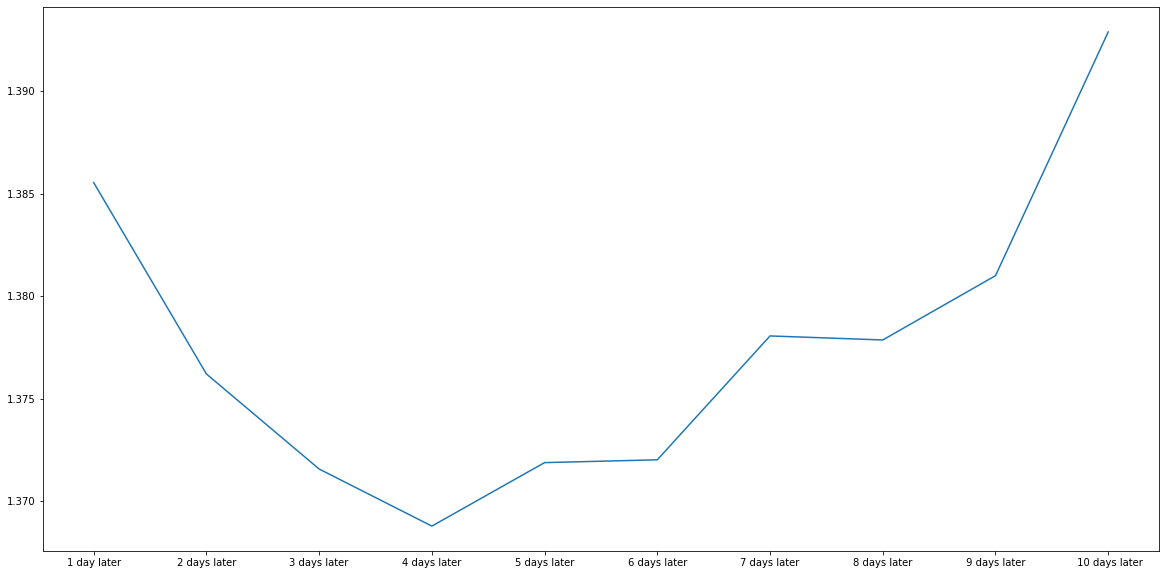

In [25]:
plt.rcParams['figure.figsize'] = (20,10)
print(pred)
plt.plot(x,y)